# Student Loan Risk with Deep Learning

In [68]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path
import matplotlib.pyplot as plt

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [2]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [4]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [5]:
# Define the target set y using the credit_ranking column
y=loans_df["credit_ranking"]

# Display a sample of y
y[0:5]

0    0
1    0
2    0
3    1
4    0
Name: credit_ranking, dtype: int64

In [6]:
# Define features set X by selecting all columns but credit_ranking
X=loans_df.drop(columns="credit_ranking")

# Review the features DataFrame
display(X.head())
print(X.info())
print(X.describe())

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   payment_history         1599 non-null   float64
 1   location_parameter      1599 non-null   float64
 2   stem_degree_score       1599 non-null   float64
 3   gpa_ranking             1599 non-null   float64
 4   alumni_success          1599 non-null   float64
 5   study_major_code        1599 non-null   float64
 6   time_to_completion      1599 non-null   float64
 7   finance_workshop_score  1599 non-null   float64
 8   cohort_ranking          1599 non-null   float64
 9   total_loan_score        1599 non-null   float64
 10  financial_aid_score     1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
None
       payment_history  location_parameter  stem_degree_score  gpa_ranking  \
count      1599.000000         1599.000000        1599.000000  1599.000000   


### Step 3: Split the features and target sets into training and testing datasets.


In [7]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [44]:
# Create a StandardScaler instance
ss=StandardScaler().fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled=ss.transform(X_train)

# Fit the scaler to the features training dataset
#I assume what was meant here was the test dataset
X_test_scaled=ss.transform(X_test)

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [48]:
# Define the the number of inputs (features) to the model
num_features=len(X_train.columns)

# Review the number of features
num_features

11

In [49]:
# Define the number of hidden nodes for the first hidden layer
hidden_units1=6

# Define the number of hidden nodes for the second hidden layer
hidden_units2=3

# Define the number of neurons in the output layer
output_units=1

In [50]:
# Create the Sequential model instance
nn_model=tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=5, activation="tanh",input_dim=num_features))

# Add the first hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_units1, activation="relu"))

# Add the second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_units2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_model.add(tf.keras.layers.Dense(units=output_units,activation="sigmoid"))


c:\Users\dclar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Display the Sequential model summary
nn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [52]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [53]:
# Fit the model using 50 epochs and the training data
fit_model=nn_model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4046 - loss: 0.7229   
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4552 - loss: 0.7033 
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4638 - loss: 0.7005 
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5239 - loss: 0.6951 
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5352 - loss: 0.6919 
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5655 - loss: 0.6890 
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5466 - loss: 0.6912 
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5614 - loss: 0.6904 
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5697 - loss: 0.6870 
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5681 - loss: 0.6879 
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5787 - loss: 0.6839 
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [54]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"The model loss is {model_loss}.\nThe model accuracy is {model_accuracy}")

13/13 - 0s - 12ms/step - accuracy: 0.7375 - loss: 0.5250
The model loss is 0.5249909162521362.
The model accuracy is 0.737500011920929


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [55]:
# Set the model's file path
file_path=Path("student_loans.keras")

# Export your model to a keras file
nn_model.save(file_path)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [56]:
# Set the model's file path
file_path=Path("student_loans.keras")

# Load the model to a new object
nn_imported=tf.keras.models.load_model(file_path)

nn_imported.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [57]:
# Make predictions with the test data
predictions=nn_imported.predict(X_test_scaled,verbose=2)

# Display a sample of the predictions
predictions[0:5]

13/13 - 0s - 6ms/step


array([[0.5012881],
       [0.2713935],
       [0.9375664],
       [0.7487568],
       [0.9142052]], dtype=float32)

In [58]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df=pd.DataFrame(columns=["predictions"], data=predictions)
predictions_df["predictions"]=round(predictions_df["predictions"],0)
display(predictions_df)
predictions_df["predictions"].unique()


,predictions
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
395,1.0
396,0.0
397,1.0
398,0.0


array([1., 0.], dtype=float32)

### Step 4: Display a classification report with the y test data and predictions

In [59]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, predictions_df["predictions"].values))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       188
           1       0.77      0.71      0.74       212

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

**The data that that would need to be collected should relate to the ability or willingness of the student to pay back the loan.  Credit history information such as score, debt level, and payment history can all speak to how willing the student is to pay back the loan.  If there are regular payments on a loan or credit card this may indicate behaviors consistent with paying back a loan.  If balances are left on credit cards and many purchases are made this may point to a less disciplined person.  In addition, information about the loan, school, academic performance, and degree should be collected.  These items may point to the ability of the student to pay back the loan.  A large loan in a field with low salaries may indicate the student would not have enough free cash after necessities to put money toward a loan.**

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

**Some collaborative filtering would be needed.  Assuming the student is in school or recently graduated, you don't know the salary they will command.  In this case you are looking at what salaries others with the same degree, from the same school, with similar GPA have commanded.  In addition you would be looking at this group to see if they paid back their loans and assuming the student would act the same.  Much of the credit information would be using context-based filtering since behaviors and actions of the student are being examined.**  

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**Access to personal information from the the group of people similar to a particular student will be a problem.  If that group's loans were serviced by the same institution than you have the loan amounts, payment history, and school information.  You probably don't have their salaries.  If same institution was not used, then much of this information will be missing.  Without accurate salary information then and assessment of free cash will be impossible.  Some general benchmarking data would have to be used instead.  In addition, you can't just pull credit history information at anytime so you are looking at a point in time.  The situation of the borrower after that point in time may vary considerably from the student you are trying to predict.  Maybe they had to get a new car, got married, started a family, have to take care of older relatives, or any number of other scenarios that affect their ability to payback a loan.  This will add noise to model and accuracy score will suffer.**

#  Hypertuning

In [81]:
import keras_tuner as kt

In [ ]:
#define model function
def model_function(hp):
    model=tf.keras.models.Sequential()
    #input layer
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    model.add(tf.keras.layers.Dense(units=hp.Int("first_units",
                min_value=1,
                max_value=10,
                step=2),
                activation=activation,
                input_dim=len(X_test.columns)
        ))
    #hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    #output layer
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    #compile
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=
                  ["accuracy"])
    
    return model

In [84]:
#create tuner
tuner = kt.Hyperband(
    model_function,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=2)

Reloading Tuner from .\untitled_project\tuner0.json


In [95]:
#run tuner
tuner.search(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test))

In [96]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 5,
 'num_layers': 2,
 'units_0': 3,
 'units_1': 7,
 'units_2': 7,
 'units_3': 7,
 'units_4': 3,
 'units_5': 1,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 3,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0003'}

In [97]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

c:\Users\dclar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\dclar\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


13/13 - 0s - 16ms/step - accuracy: 0.7750 - loss: 0.5336
Loss: 0.5335803031921387, Accuracy: 0.7749999761581421


In [98]:
#fit best model to get history
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

best_model_fit=tuner.hypermodel.build(best_hyper)
history=best_model_fit.fit(X_train_scaled, y_train,epochs=100,validation_data=(X_test_scaled, y_test), callbacks=[early_stop])

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4414 - loss: 0.7283 - val_accuracy: 0.5100 - val_loss: 0.7047
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5147 - loss: 0.7005 - val_accuracy: 0.6000 - val_loss: 0.6874
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5851 - loss: 0.6830 - val_accuracy: 0.6450 - val_loss: 0.6737
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6546 - loss: 0.6651 - val_accuracy: 0.6500 - val_loss: 0.6614
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6850 - loss: 0.6541 - val_accuracy: 0.6625 - val_loss: 0.6480
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - loss: 0.6379 - val_accuracy: 0.6800 - val_loss: 0.6350
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6992 - loss: 0.6234 - val_accuracy: 0.6950 - val_loss: 0.6227
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 0.6164 - val_accuracy: 0.7025 - v

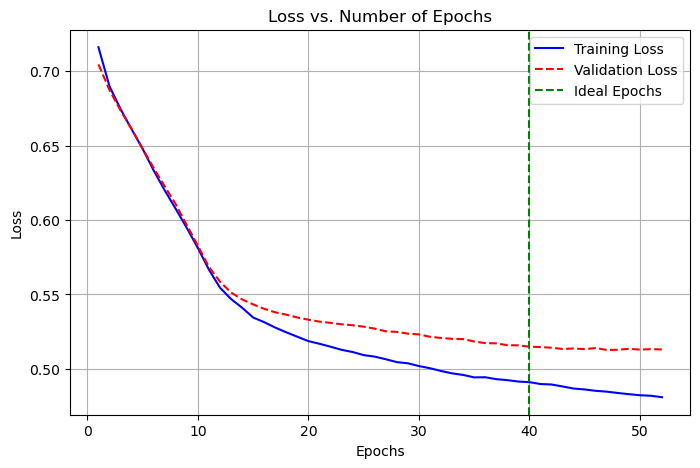

In [101]:
#plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='dashed')
plt.axvline(x=40, color='green', linestyle='--', label='Ideal Epochs')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()

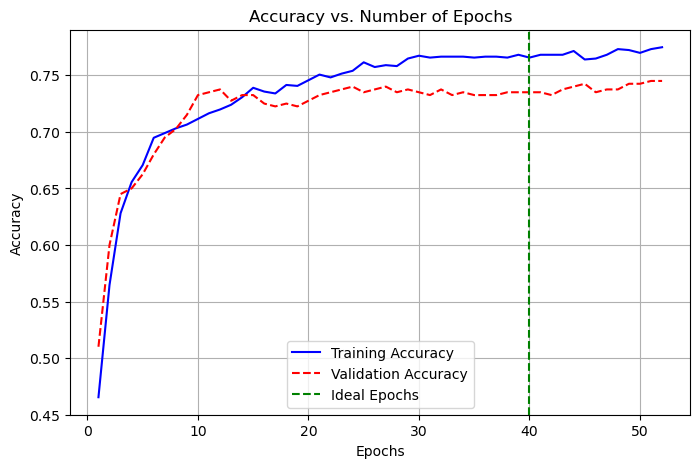

In [ ]:
#plot accuracy vs. epochs
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red', linestyle='dashed')
plt.axvline(x=40, color='green', linestyle='--', label='Ideal Epochs')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()

#although the accuracy is not benefitting from over ~22 epochs the loss is still dropping to 40.